In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
music_df = pd.read_csv('dataY.csv')
music_df.head()

,Unnamed: 0,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,79,2000,0.286654,0.589039,242958.0720,0.622223,0.099790,0.200918,-8.288862,0.089854,118.932672,0.557350,46.3125,7,1
1,80,2001,0.270392,0.585933,241011.5400,0.638172,0.094754,0.187240,-8.051444,0.091257,117.903201,0.550953,48.6245,7,1
2,81,2002,0.275409,0.578628,239810.2355,0.651352,0.081103,0.195589,-7.517304,0.083809,119.560700,0.547840,48.2020,7,1
3,82,2003,0.247379,0.576633,245057.7080,0.666178,0.080685,0.195467,-7.359409,0.092316,121.006536,0.534943,48.4045,7,1
4,83,2004,0.264210,0.572262,239908.2885,0.660553,0.069287,0.202255,-7.358680,0.093820,121.676676,0.530876,48.9740,7,1


In [3]:
# del music_df['Unnamed: 0']
# music_df.head()

In [4]:
# Use Pandas get_dummies to convert categorical data
music_df = pd.get_dummies(music_df)
music_df.head()

,Unnamed: 0,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,79,2000,0.286654,0.589039,242958.0720,0.622223,0.099790,0.200918,-8.288862,0.089854,118.932672,0.557350,46.3125,7,1
1,80,2001,0.270392,0.585933,241011.5400,0.638172,0.094754,0.187240,-8.051444,0.091257,117.903201,0.550953,48.6245,7,1
2,81,2002,0.275409,0.578628,239810.2355,0.651352,0.081103,0.195589,-7.517304,0.083809,119.560700,0.547840,48.2020,7,1
3,82,2003,0.247379,0.576633,245057.7080,0.666178,0.080685,0.195467,-7.359409,0.092316,121.006536,0.534943,48.4045,7,1
4,83,2004,0.264210,0.572262,239908.2885,0.660553,0.069287,0.202255,-7.358680,0.093820,121.676676,0.530876,48.9740,7,1


In [5]:
# Assign x (data) and y (target)
X = music_df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence']]
y = music_df["year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(21, 13) (21, 1)


In [6]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

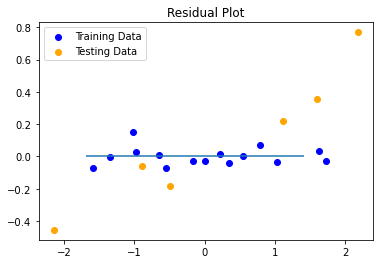

<Figure size 432x288 with 0 Axes>

In [10]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

plt.savefig("../static/Images/Residual Plot - Year.png")

In [11]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.16842196488910313, R2: 0.8725194799845041


In [12]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12421167495114831, R2: 0.9059827563156958


In [13]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15588767129455627, R2: 0.8820068307971599


In [14]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.12595339100173025, R2: 0.9046644314285962
